
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

When K=1 K-nearest neighbors will classify a point the same as its first nearest neighbor, this has the danger of overfitting the data causing the variance of the model to be high. This means that when the model is deployed on an unseen data set, there will likley be a lot of error. In contrast when K is high all the points will be classified as the largest class in the distribution, this will cause bias in the model because there is no information gained from K-nearest neighbors, and when the model is deployed on unseen data the accuracy rate will be the baseline accruacy.

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers.


In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('/Users/ReeceWooten/Documents/School /MSBA/Fall /Adv.Predictive/russett_full_v2.csv')
data[:5]

IOError: File /Users/ReeceWooten/Documents/School /MSBA/Fall /Adv.Predictive/russett_full_v2.csv does not exist

In [ ]:
index_change=data[['country','rent','inst','ecks','demo_score']]
index_change=index_change.set_index('country')

In [ ]:
index_change['rent'].plot(kind='bar')

In [ ]:
index_change['rent'].plot(kind='box')

In [ ]:
index_change['inst'].plot(kind='bar')

In [ ]:
index_change['inst'].plot(kind='box')

In [ ]:
index_change['ecks'].plot(kind='bar')

In [ ]:
index_change['ecks'].plot(kind='box')

In [ ]:
index_change['demo_score'].plot(kind='bar')

In [ ]:
index_change['demo_score'].plot(kind='box')

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' .
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   
Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?


In [ ]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('demo_score ~ rent+inst+ecks', data=data, return_type='dataframe')

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_train_ols = regr.predict(X_train)


In [ ]:
train_rmse=sqrt(mean_squared_error(y_train, y_pred_train_ols))
# The mean squared error
print("Root Mean squared error on X_test: %.2f"
      % sqrt(mean_squared_error(y_train, y_pred_train_ols)))

In [ ]:
y_pred_test_ols = regr.predict(X_test)


In [ ]:
test_rmse=sqrt(mean_squared_error(y_test, y_pred_test_ols))
# The mean squared error
print("Root Mean squared error on X_test: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred_test_ols)))

In [ ]:
test_rmse-train_rmse

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss. You can use the sklearn package. Set regularization parameter alpha to 0.0 and all other parameters as default. Report RMSE obtained on both X_train and X_test.


In [ ]:
from sklearn.linear_model import HuberRegressor

In [ ]:
y_train_array=array(y_train)

In [ ]:
huber=HuberRegressor(alpha=0.0)

In [ ]:
huber.fit(X=X_train,y=y_train_array)

In [ ]:
y_pred_test_huber = huber.predict(X_test)


In [ ]:
test_rmse=sqrt(mean_squared_error(y_test, y_pred_test_huber))
# The mean squared error
print("Root Mean squared error on X_test: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred_test_huber)))

In [ ]:
y_pred_train_huber = huber.predict(X_train)

In [ ]:
train_rmse=sqrt(mean_squared_error(y_train, y_pred_train_huber))
# The mean squared error
print("Root Mean squared error on X_train: %.2f"
      % sqrt(mean_squared_error(y_train, y_pred_train_huber)))

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general?

In [63]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred_ols = regr.predict(X)

In [85]:
y_array=array(y)

In [87]:
import itertools
y_=itertools.chain.from_iterable(y_array)
y_array=array(list(y_))

import itertools
y_p=itertools.chain.from_iterable(y_pred_ols)
y_pred_array=array(list(y_p))

In [90]:
residual_ols=y_array-y_pred_array

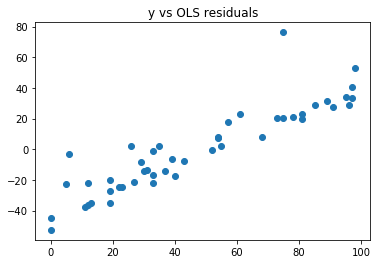

In [94]:
scatter(y=residual_ols,x=y_array)
title('y vs OLS residuals')

In [77]:
y_array=array(y)

In [78]:
import itertools
train=itertools.chain.from_iterable(y_array)
y_array=array(list(train))

In [79]:
huber=HuberRegressor(alpha=0.0)

In [80]:
huber.fit(X=X,y=y)

HuberRegressor(alpha=0.0, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [81]:
y_pred_huber = huber.predict(X)


In [82]:
residual_test=y_array-y_pred_huber

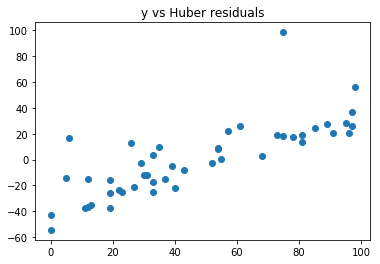

In [83]:
scatter(y=residual_test,x=y_array)
title('y vs Huber residuals')

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be  p̂ p^  ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25?

i. 
n = p(1-p) (za/2/ e) 2

.5(.5)(1.645/.03)^2=752

.25(.75)(1.645/.03)^2=564

2 Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

.5(.5)(3.3/.03)^2= 3025

.5(.5)(1.96/.015)^2= 4268.44

# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [345]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [346]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

In [347]:
X

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.60582632,
        -0.58432873, -0.5786918 ],
       [-0.03956713, -0.93853666, -1.08218016, ...,  0.78127042,
         2.18675392,  1.85055575],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.73183676,
        -0.46890921, -0.47161867],
       ..., 
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.02102345,
        -0.7405101 , -0.59987616],
       [-0.9560041 , -0.93853666,  0.82123474, ..., -0.09079363,
        -0.91899961, -0.47161867],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.72871818,
        -0.44336002, -0.6682648 ]])

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

(a) Perform PCA using the sklearn PCA package. Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix). Refer to Figure 10.4 of JW for an example. You may use the output attribute explained variance ratio. (3pts)

In [231]:
import numpy as np
from sklearn.decomposition import PCA

In [233]:
pca=PCA(n_components=65)

In [244]:
n_components=array(range(1,66))

In [243]:
fit=pca.fit(X)
variance=fit.explained_variance_ratio_

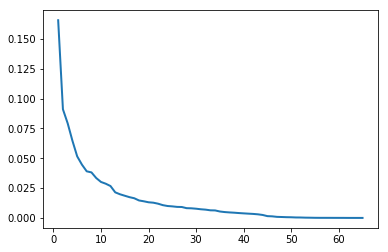

In [246]:
fig, ax = plt.subplots()
line1, = ax.plot(n_components, variance, linewidth=2,
                 label='Dashes set retroactively')

In [250]:
def running_sum(a):
  tot = 0
  for item in a:
    tot += item
    yield tot

In [261]:
tot=list(running_sum(variance))

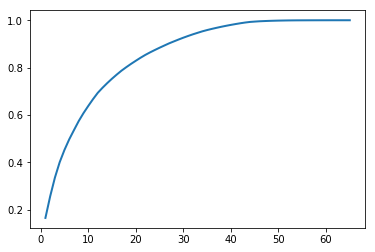

In [265]:
fig, ax = plt.subplots()
line1, = ax.plot(n_components, tot, linewidth=2,
                 label='Dashes set retroactively')

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)


In [271]:
comp_tot=DataFrame(tot,n_components)

In [299]:
comp_tot.columns = ['tot']
comp_tot

,tot
1,0.165760
2,0.256865
3,0.336175
4,0.400882
5,0.452496
6,0.497157
7,0.536240
8,0.574404
9,0.607856
10,0.638018


3, 9 and 27

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

Resource:
http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab11/Lab%2011%20-%20PCR%20and%20PLS%20Regression%20in%20Python.pdf

In [327]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

/Users/ReeceWooten/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [348]:
X_reduced = fit.transform(X)[:,:3]
# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced, y)
# Prediction with test data
pred = regr.predict(X_reduced)
mean_squared_error(y, pred)

5120.6055477937271

In [349]:
X_reduced = fit.transform(X)[:,:9]
# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced, y)
# Prediction with test data
pred = regr.predict(X_reduced)
mean_squared_error(y, pred)

3942.7867514263485

In [350]:
X_reduced = fit.transform(X)[:,:27]
# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced, y)
# Prediction with test data
pred = regr.predict(X_reduced)
mean_squared_error(y, pred)

2857.425949000683

# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 


Forward selection is the method of adding variables to the model one by one and only stopping when the newly added variables are no longer statistically significant. This method has draw backs because adding variables to the model one by one will sometimes cause previously significant variables to become insignificant. Backward Selection fixes this draw back by putting all the variables into the model and only taking out the ones which are insignificant, and rerunning the model until all variables are significant. Backward selection also has a drawback that a previously dropped variable might be significant in the final reduced model, but was taken out. 